In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import ticker

plt.rcParams['figure.figsize'] = [12, 8]
pd.options.plotting.backend = "plotly"

In [2]:
column_dict = {
    "1":{"color":"b","label":"Cat 1 (10-30 cm)"},
    "2":{"color":"r","label":"Cat 2 (31-45 cm)"},
    "3":{"color":"g","label":"Cat 3 (46-60 cm)"},
    "4":{"color":"k","label":"Cat 4 (61-75 cm)"},
    "5":{"color":"c","label":"Cat 5 (75 cm <)"},
}

In [3]:
dynamic = pd.read_csv('data/dynamic.csv')
size_category = pd.read_csv('data/size_category.csv')
depth = pd.read_csv('data/depth.csv')
richness = pd.read_csv('data/richness.csv')
trend = pd.read_csv('data/trend.csv')

In [4]:
df = dynamic.set_index("year").T.reset_index().rename(columns={
    "index":"Year",
    "total closed sinkholes": "Total Closed Sinkholes",
    "total new sinkholes": "Total New Sinkholes",
    "open sinkholes (annual average)": "Open Sinkholes (Annual Average)"
})

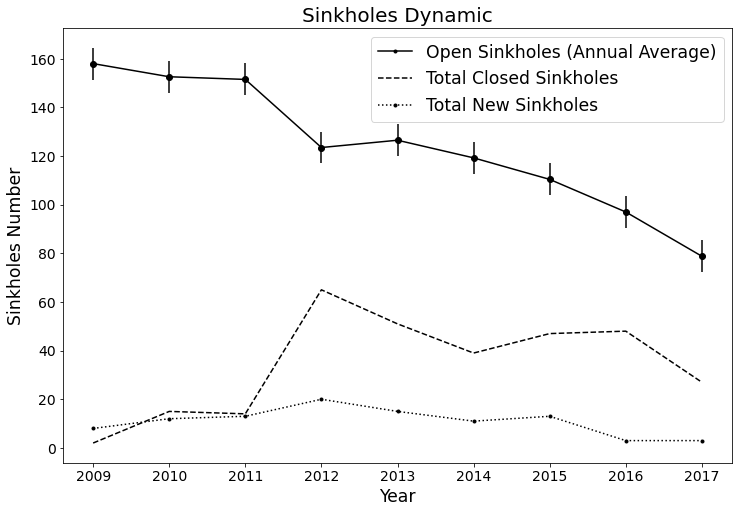

In [5]:
yerr = stats.sem(df.iloc[:, 1], axis=None, ddof=0)

fig, ax = plt.subplots()
ax.plot(df['Year'], df['Open Sinkholes (Annual Average)'], 'k', marker='.', label='Open Sinkholes (Annual Average)')
ax.errorbar(df['Year'], df['Open Sinkholes (Annual Average)'], yerr=yerr, fmt='o', color='k')
ax.plot(df['Year'], df['Total Closed Sinkholes'], 'k--', label='Total Closed Sinkholes')
ax.plot(df['Year'], df['Total New Sinkholes'], 'k:', marker='.', label='Total New Sinkholes')

ax.set_title('Sinkholes Dynamic', fontsize=20)

ax.set_xlabel('Year', fontsize='xx-large')
ax.set_ylabel('Sinkholes Number', fontsize='xx-large')
legend = ax.legend(shadow=False, fontsize='xx-large')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("dynamic.png")
plt.show()

In [6]:
df_size_category = size_category.set_index("category").T.reset_index().rename(columns={"index":"month_year"})

In [7]:
df_size_category['month_year'] = pd.to_datetime(df_size_category['month_year'], format='%b-%y')

In [8]:
df_mean_size_category = df_size_category.groupby(df_size_category['month_year'].dt.year).mean().reset_index()

In [9]:
df_mean_size_category

category,month_year,1,2,3,4,5,6,6 (acumuladas),open,open+close
0,2009,62.166667,38.500000,27.000000,7.833333,17.333333,0.166667,4.166667,152.833333,157.000000
1,2010,60.000000,39.000000,28.800000,7.400000,17.400000,3.000000,9.800000,152.600000,162.400000
2,2011,54.500000,42.750000,28.000000,8.750000,17.500000,3.500000,19.500000,151.500000,171.000000
3,2012,47.333333,39.000000,18.666667,5.333333,12.333333,11.500000,61.166667,122.666667,183.833333
4,2013,46.166667,40.166667,23.166667,5.833333,10.833333,8.500000,73.666667,126.166667,199.833333
5,2014,45.333333,37.000000,20.000000,4.666667,14.000000,6.000000,91.333333,121.000000,212.333333
6,2015,39.750000,41.750000,16.250000,3.000000,10.250000,2.500000,111.500000,111.000000,222.500000
7,2016,32.600000,35.400000,13.000000,3.200000,11.800000,3.600000,131.000000,96.000000,227.000000
8,2017,17.400000,23.200000,15.400000,2.800000,8.400000,0.800000,162.000000,67.200000,229.200000


In [10]:
df_mean_copy_size_category = df_mean_size_category.copy()

In [11]:
df_mean_copy_size_category["1"] = df_mean_size_category["1"]*100/df_mean_size_category["open+close"]
df_mean_copy_size_category["2"] = df_mean_size_category["2"]*100/df_mean_size_category["open+close"]
df_mean_copy_size_category["3"] = df_mean_size_category["3"]*100/df_mean_size_category["open+close"]
df_mean_copy_size_category["4"] = df_mean_size_category["4"]*100/df_mean_size_category["open+close"]
df_mean_copy_size_category["5"] = df_mean_size_category["5"]*100/df_mean_size_category["open+close"]
df_mean_copy_size_category["6"] = df_mean_size_category["6"]*100/df_mean_size_category["open+close"]

In [12]:
df_depth = depth.set_index("category").T.reset_index().rename(columns={"index":"month_year"})

In [13]:
df_depth['month_year'] = pd.to_datetime(df_depth['month_year'], format='%b-%y')

In [14]:
df_mean_depth = df_depth.groupby(df_depth['month_year'].dt.year).mean().reset_index()

In [15]:
df_mean_depth

category,month_year,1,2,3,4,5,6,open+closed,open
0,2009,84.000000,38.333333,19.333333,7.833333,3.333333,0.166667,157.000000,152.833333
1,2010,82.600000,39.000000,19.000000,8.200000,3.800000,3.000000,162.400000,152.600000
2,2011,70.250000,43.000000,24.000000,9.250000,5.000000,3.500000,171.000000,151.500000
3,2012,68.833333,28.000000,14.666667,6.000000,5.166667,11.500000,183.833333,122.666667
4,2013,70.833333,30.166667,16.166667,4.833333,4.166667,8.500000,201.500000,126.166667
5,2014,63.000000,32.666667,17.000000,4.333333,4.000000,6.000000,212.333333,121.000000
6,2015,67.750000,24.500000,10.000000,4.000000,4.750000,2.500000,222.500000,111.000000
7,2016,57.800000,23.600000,8.600000,2.800000,3.200000,3.600000,227.000000,96.000000
8,2017,40.600000,17.600000,7.200000,1.000000,0.800000,0.800000,229.200000,67.200000


In [16]:
df_mean_copy_depth = df_mean_depth.copy()

In [17]:
df_mean_copy_depth["1"] = df_mean_depth["1"]*100/df_mean_depth["open+closed"]
df_mean_copy_depth["2"] = df_mean_depth["2"]*100/df_mean_depth["open+closed"]
df_mean_copy_depth["3"] = df_mean_depth["3"]*100/df_mean_depth["open+closed"]
df_mean_copy_depth["4"] = df_mean_depth["4"]*100/df_mean_depth["open+closed"]
df_mean_copy_depth["5"] = df_mean_depth["5"]*100/df_mean_depth["open+closed"]
df_mean_copy_depth["6"] = df_mean_depth["6"]*100/df_mean_depth["open+closed"]

In [18]:
df_mean_copy_depth

category,month_year,1,2,3,4,5,6,open+closed,open
0,2009,53.503185,24.416136,12.314225,4.989384,2.123142,0.106157,157.000000,152.833333
1,2010,50.862069,24.014778,11.699507,5.049261,2.339901,1.847291,162.400000,152.600000
2,2011,41.081871,25.146199,14.035088,5.409357,2.923977,2.046784,171.000000,151.500000
3,2012,37.443336,15.231188,7.978241,3.263826,2.810517,6.255666,183.833333,122.666667
4,2013,35.153019,14.971050,8.023160,2.398677,2.067825,4.218362,201.500000,126.166667
5,2014,29.670330,15.384615,8.006279,2.040816,1.883830,2.825746,212.333333,121.000000
6,2015,30.449438,11.011236,4.494382,1.797753,2.134831,1.123596,222.500000,111.000000
7,2016,25.462555,10.396476,3.788546,1.233480,1.409692,1.585903,227.000000,96.000000
8,2017,17.713787,7.678883,3.141361,0.436300,0.349040,0.349040,229.200000,67.200000


In [19]:
df_richness = richness.set_index("category").T.reset_index().rename(columns={"index":"month_year"})

In [20]:
df_richness['month_year'] = pd.to_datetime(df_richness['month_year'], format='%b-%y')

In [21]:
df_richness

category,month_year,0,1,2,3,4,5,total
0,2009-01-01,3,49,47,37,16,2,154
1,2009-03-01,7,17,50,39,34,8,155
2,2009-05-01,4,20,37,38,41,14,154
3,2009-08-01,3,14,35,42,43,14,151
4,2009-10-01,2,23,42,49,27,7,150
5,2009-11-01,2,23,42,49,27,7,150
6,2010-01-01,8,22,66,38,16,3,153
7,2010-04-01,4,9,55,43,31,5,147
8,2010-06-01,1,24,42,46,28,16,157
9,2010-08-01,3,28,54,34,20,12,151


In [22]:
df_mean_richness = df_richness.groupby(df_richness['month_year'].dt.year).mean().reset_index()

In [23]:
df_mean_richness

category,month_year,0,1,2,3,4,5,total
0,2009,3.500000,24.333333,42.166667,42.333333,31.333333,8.666667,152.333333
1,2010,3.400000,20.200000,54.200000,40.800000,24.200000,8.600000,151.400000
2,2011,1.000000,25.750000,45.000000,42.250000,16.500000,7.250000,137.750000
3,2012,7.000000,40.000000,63.166667,31.666667,15.166667,8.166667,165.166667
4,2013,4.000000,38.333333,58.666667,24.000000,8.166667,5.500000,138.666667
5,2014,1.666667,27.666667,36.333333,36.000000,15.333333,4.000000,121.000000
6,2015,4.750000,25.750000,33.000000,27.250000,14.500000,11.250000,116.500000
7,2016,6.600000,31.600000,27.200000,19.600000,6.400000,2.400000,93.800000
8,2017,5.800000,16.600000,11.600000,7.200000,2.200000,1.600000,45.000000


In [24]:
df_mean_copy_richness = df_mean_richness.copy()

In [25]:
df_mean_copy_richness["0"] = df_mean_richness["0"]*100/df_mean_richness["total"]
df_mean_copy_richness["1"] = df_mean_richness["1"]*100/df_mean_richness["total"]
df_mean_copy_richness["2"] = df_mean_richness["2"]*100/df_mean_richness["total"]
df_mean_copy_richness["3"] = df_mean_richness["3"]*100/df_mean_richness["total"]
df_mean_copy_richness["4"] = df_mean_richness["4"]*100/df_mean_richness["total"]
df_mean_copy_richness["5"] = df_mean_richness["5"]*100/df_mean_richness["total"]

In [26]:
df_mean_copy_richness

category,month_year,0,1,2,3,4,5,total
0,2009,2.297593,15.973742,27.680525,27.789934,20.568928,5.689278,152.333333
1,2010,2.245707,13.342140,35.799207,26.948481,15.984148,5.680317,151.400000
2,2011,0.725953,18.693285,32.667877,30.671506,11.978221,5.263158,137.750000
3,2012,4.238143,24.217962,38.244198,19.172553,9.182644,4.944501,165.166667
4,2013,2.884615,27.644231,42.307692,17.307692,5.889423,3.966346,138.666667
5,2014,1.377410,22.865014,30.027548,29.752066,12.672176,3.305785,121.000000
6,2015,4.077253,22.103004,28.326180,23.390558,12.446352,9.656652,116.500000
7,2016,7.036247,33.688699,28.997868,20.895522,6.823028,2.558635,93.800000
8,2017,12.888889,36.888889,25.777778,16.000000,4.888889,3.555556,45.000000


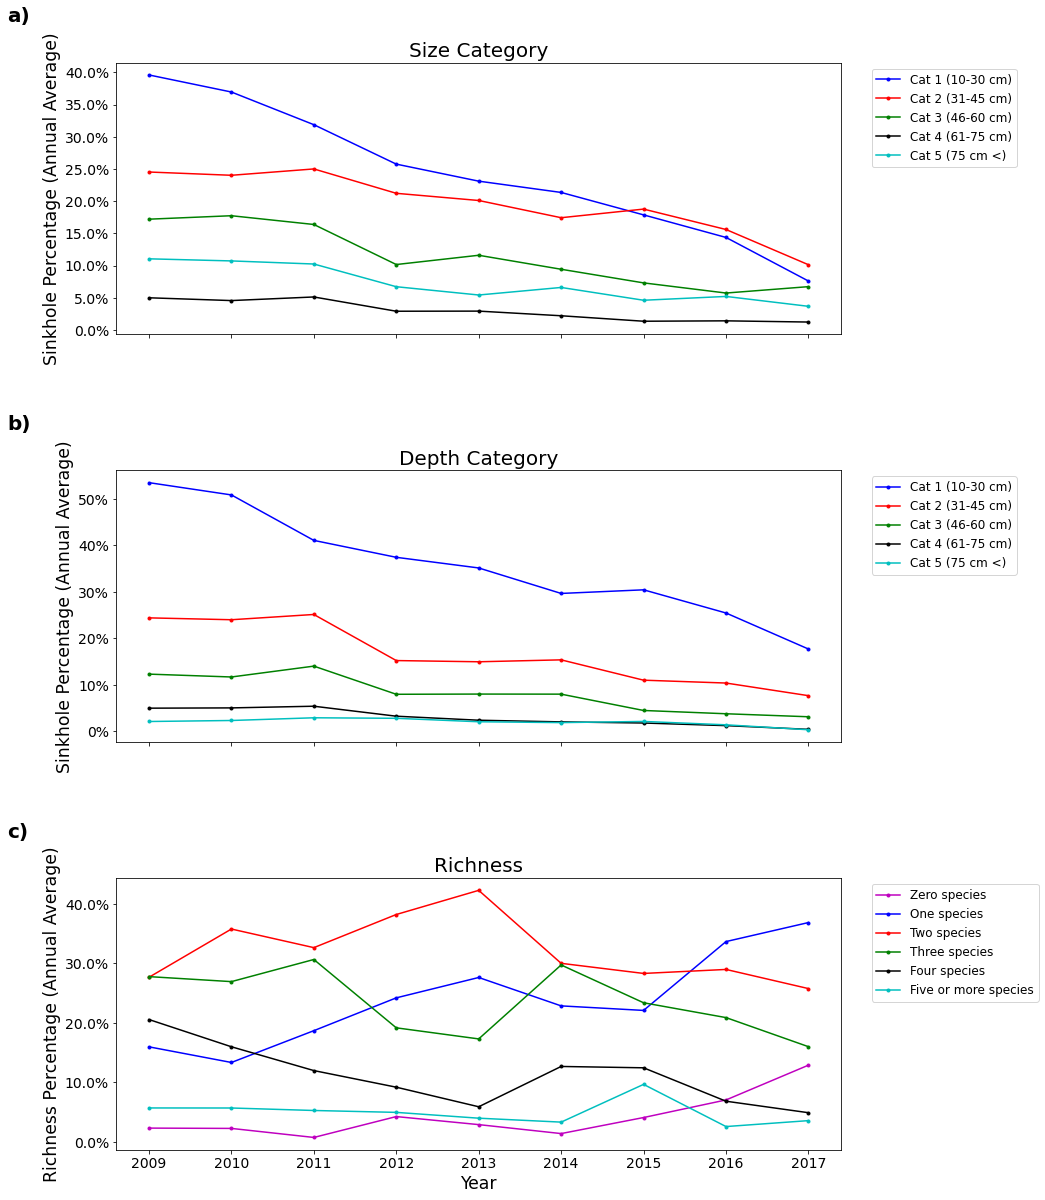

In [27]:
plt.rcParams['figure.figsize'] = [13, 20]

fig, (ax1,ax2,ax3) = plt.subplots(3, 1, sharex=True)
fig.subplots_adjust(hspace=0.5)

for key in column_dict:
    ax1.plot(df_mean_copy_size_category['month_year'], 
            df_mean_copy_size_category[key], 
            color=column_dict[key]["color"], 
            marker='.', 
            label=column_dict[key]["label"])

ax1.text(-0.15, 1.15, "a)", fontweight="bold", transform=ax1.transAxes, size=20)
ax1.yaxis.set_major_formatter(ticker.PercentFormatter())
ax1.set_title('Size Category', fontsize=20)

ax1.set_ylabel('Sinkhole Percentage (Annual Average)', fontsize='xx-large')
ax1.legend(fontsize='large',bbox_to_anchor=(1.25, 1))

ax1.tick_params(axis="x", labelsize=14)
ax1.tick_params(axis="y", labelsize=14)

for key in column_dict:
    ax2.plot(df_mean_copy_depth['month_year'], 
            df_mean_copy_depth[key], 
            color=column_dict[key]["color"], 
            marker='.', 
            label=column_dict[key]["label"])

ax2.text(-0.15, 1.15, "b)", fontweight="bold", transform=ax2.transAxes, size=20)
ax2.yaxis.set_major_formatter(ticker.PercentFormatter())
ax2.set_title('Depth Category', fontsize=20)

ax2.set_ylabel('Sinkhole Percentage (Annual Average)', fontsize='xx-large')
ax2.legend(fontsize='large',bbox_to_anchor=(1.25, 1))

ax2.tick_params(axis="x", labelsize=14)
ax2.tick_params(axis="y", labelsize=14)

column_dict_richness = {
    "0":{"color":"m","label":"Zero species"},
    "1":{"color":"b","label":"One species"},
    "2":{"color":"r","label":"Two species"},
    "3":{"color":"g","label":"Three species"},
    "4":{"color":"k","label":"Four species"},
    "5":{"color":"c","label":"Five or more species"},
}



for key in column_dict_richness:
    ax3.plot(df_mean_copy_richness['month_year'], 
            df_mean_copy_richness[key], 
            color=column_dict_richness[key]["color"], 
            marker='.', 
            label=column_dict_richness[key]["label"])

ax3.text(-0.15, 1.15, "c)", fontweight="bold", transform=ax3.transAxes, size=20)
ax3.yaxis.set_major_formatter(ticker.PercentFormatter())
ax3.set_title('Richness', fontsize=20)

ax3.set_xlabel('Year', fontsize='xx-large')
ax3.set_ylabel('Richness Percentage (Annual Average)', fontsize='xx-large')
ax3.legend(fontsize='large',bbox_to_anchor=(1.28, 1))

ax3.tick_params(axis="x", labelsize=14)
ax3.tick_params(axis="y", labelsize=14)

plt.savefig("sinkholes_description.png")
plt.show()

In [28]:
df = trend.set_index("num")

In [29]:
df["date"]=pd.to_datetime(df['date'], format='%b-%y')

In [30]:
df = df.rename(columns={"accmonth":"Cummulative Month", "rich": "Richness", "cob": "Coverage", "sup":"Surface"})

In [31]:
df

,date,Cummulative Month,Richness,Coverage,Surface
num,,,,,
1,2009-01-01,1,2.136691,24.479322,1.519
2,2009-03-01,4,2.647482,23.200541,1.418
3,2009-05-01,9,2.827338,16.655059,1.257
4,2009-08-01,17,2.964029,15.966287,1.294
5,2009-10-01,27,2.964029,14.932738,1.474
6,2009-11-01,38,2.482014,13.171715,3.103
7,2010-01-01,39,2.187050,3.743746,1.480
8,2010-04-01,43,2.719424,11.894613,1.648
9,2010-06-01,49,2.640288,12.458598,1.605


In [32]:
df_trend_depth = pd.read_csv('data/7may2021_DatFigTrendProfundidad.txt', sep=" ").reset_index()

In [33]:
df_trend_depth['date'] = pd.to_datetime(df_trend_depth['date'], format='%b%y')

In [34]:
df_trend_depth = pd.concat([df_trend_depth, trend['accmonth']],axis=1)

In [38]:
df_trend_elip = pd.read_csv('data/13may2021_DatFigTrendSupElip.txt', sep=" ").reset_index()

In [42]:
df_trend_elip['date'] = pd.to_datetime(df_trend_elip['date'], format='%b%Y')

In [43]:
df_trend_elip = pd.concat([df_trend_elip, trend['accmonth']],axis=1)

In [44]:
df_trend_elip.columns

Index(['index', 'date', 'depth.avg', 'depth.SE', 'accmonth'], dtype='object')

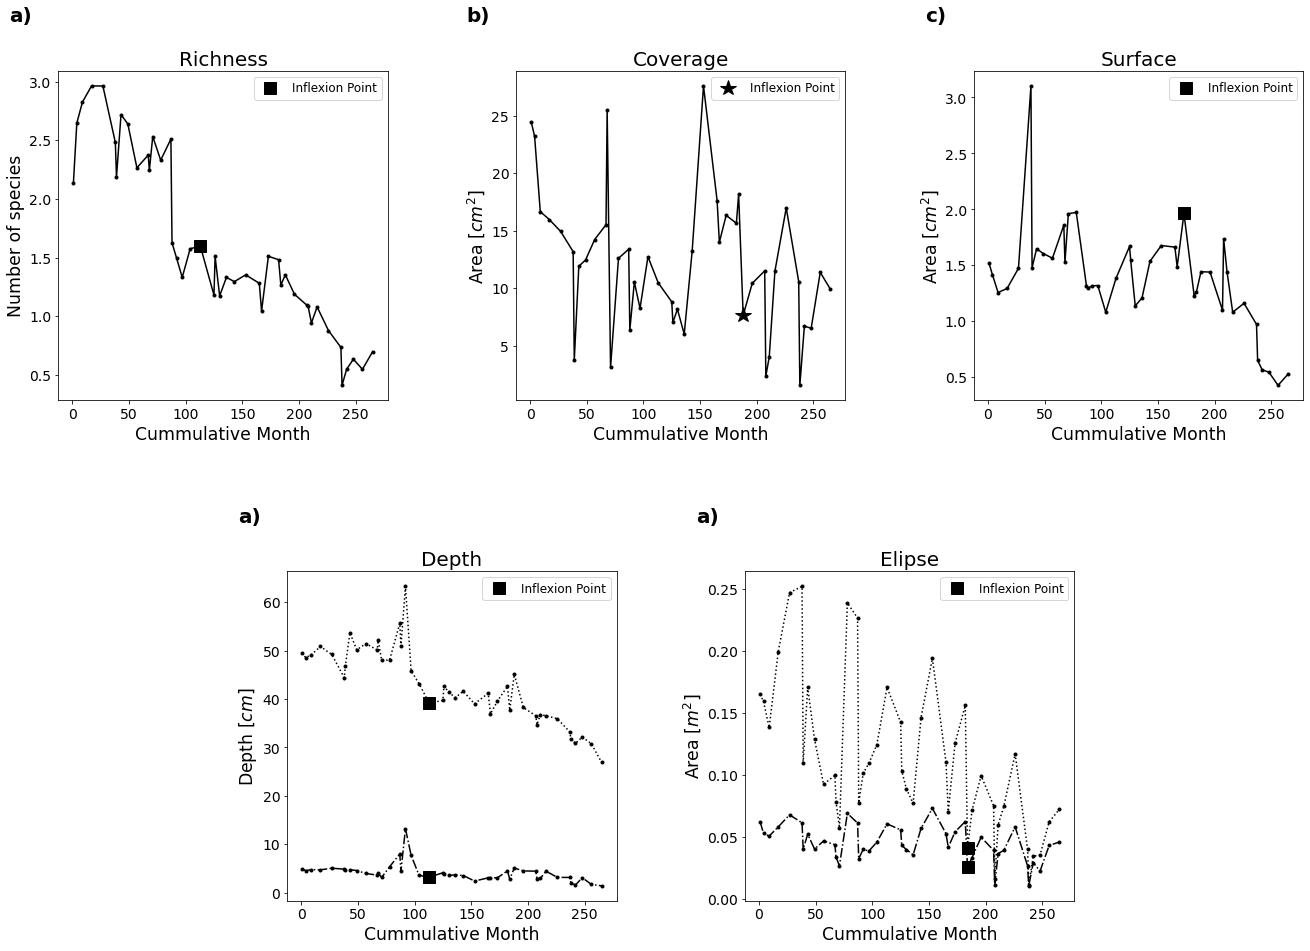

In [51]:
plt.rcParams['figure.figsize'] = [18, 13]


ax1 = plt.subplot2grid((2,6), (0,0), colspan=2)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)

ax1.plot(df['Cummulative Month'], df["Richness"], color='k', marker='.')
ax1.plot(df.iloc[19]['Cummulative Month'],df.iloc[19]["Richness"], 'ks', markersize=12, linewidth=3, label="Inflexion Point")

ax1.text(-0.15, 1.15, "a)", fontweight="bold", transform=ax1.transAxes, size=20)
ax1.set_title('Richness', fontsize=20)

ax1.set_xlabel('Cummulative Month', fontsize='xx-large')
ax1.set_ylabel('Number of species', fontsize='xx-large')

ax1.tick_params(axis="x", labelsize=14)
ax1.tick_params(axis="y", labelsize=14)
ax1.legend(fontsize='large')

ax2.plot(df['Cummulative Month'], df["Coverage"], color='k', marker='.')
ax2.plot(df.iloc[31]['Cummulative Month'],df.iloc[31]["Coverage"], 'k*', markersize=16, linewidth=3, label="Inflexion Point")

ax2.text(-0.15, 1.15, "b)", fontweight="bold", transform=ax2.transAxes, size=20)
ax2.set_title('Coverage', fontsize=20)

ax2.set_xlabel('Cummulative Month', fontsize='xx-large')
ax2.set_ylabel(r'Area [$cm^2$]', fontsize='xx-large')

ax2.tick_params(axis="x", labelsize=14)
ax2.tick_params(axis="y", labelsize=14)
ax2.legend(fontsize='large')

ax3.plot(df['Cummulative Month'], df["Surface"], color='k', marker='.')
ax3.plot(df.iloc[28]['Cummulative Month'],df.iloc[28]["Surface"], 'ks', markersize=12, linewidth=3, label="Inflexion Point")

ax3.text(-0.15, 1.15, "c)", fontweight="bold", transform=ax3.transAxes, size=20)
ax3.set_title('Surface', fontsize=20)

ax3.set_xlabel('Cummulative Month', fontsize='xx-large')
ax3.set_ylabel(r'Area [$cm^2$]', fontsize='xx-large')

ax3.tick_params(axis="x", labelsize=14)
ax3.tick_params(axis="y", labelsize=14)
ax3.legend(fontsize='large')

ax4.plot(df_trend_depth['accmonth'], df_trend_depth["depth.avg"], color='k', marker='.', linestyle='dotted')
ax4.plot(df_trend_depth.iloc[19]['accmonth'],df_trend_depth.iloc[19]["depth.avg"], 'ks', markersize=12, linewidth=3, label="Inflexion Point")
ax4.plot(df_trend_depth['accmonth'], df_trend_depth["depth.SE"], color='k', marker='.', linestyle='dashdot')
ax4.plot(df_trend_depth.iloc[19]['accmonth'],df_trend_depth.iloc[19]["depth.SE"], 'ks', markersize=12, linewidth=3)

ax4.text(-0.15, 1.15, "a)", fontweight="bold", transform=ax4.transAxes, size=20)
ax4.set_title('Depth', fontsize=20)

ax4.set_xlabel('Cummulative Month', fontsize='xx-large')
ax4.set_ylabel('Depth [$cm$]', fontsize='xx-large')

ax4.tick_params(axis="x", labelsize=14)
ax4.tick_params(axis="y", labelsize=14)
ax4.legend(fontsize='large')

ax5.plot(df_trend_elip['accmonth'], df_trend_elip["depth.avg"], color='k', marker='.', linestyle='dotted')
ax5.plot(df_trend_elip.iloc[30]['accmonth'],df_trend_elip.iloc[30]["depth.avg"], 'ks', markersize=12, linewidth=3, label="Inflexion Point")
ax5.plot(df_trend_elip['accmonth'], df_trend_elip["depth.SE"], color='k', marker='.', linestyle='dashdot')
ax5.plot(df_trend_elip.iloc[30]['accmonth'],df_trend_elip.iloc[30]["depth.SE"], 'ks', markersize=12, linewidth=3)

ax5.text(-0.15, 1.15, "a)", fontweight="bold", transform=ax5.transAxes, size=20)
ax5.set_title('Elipse', fontsize=20)

ax5.set_xlabel('Cummulative Month', fontsize='xx-large')
ax5.set_ylabel('Area [$m^2$]', fontsize='xx-large')

ax5.tick_params(axis="x", labelsize=14)
ax5.tick_params(axis="y", labelsize=14)
ax5.legend(fontsize='large')

plt.tight_layout(pad=0, h_pad=6.5, w_pad=6.5)
plt.savefig("trend_analysis.png")
plt.show()